<a href="https://colab.research.google.com/github/CB200999/TimeSeriesForcasting/blob/main/TimeSeriesForcasting_with_XGBoost_EnergyConsumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error


color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [20]:
df = pd.read_csv('/content/drive/MyDrive/HourlyEnergyConsumption/PJME_hourly.csv')

In [21]:
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [22]:
df = df.set_index('Datetime')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145366 entries, 2002-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PJME_MW  145366 non-null  float64
dtypes: float64(1)
memory usage: 2.2+ MB


In [24]:
df.index = pd.to_datetime(df.index)

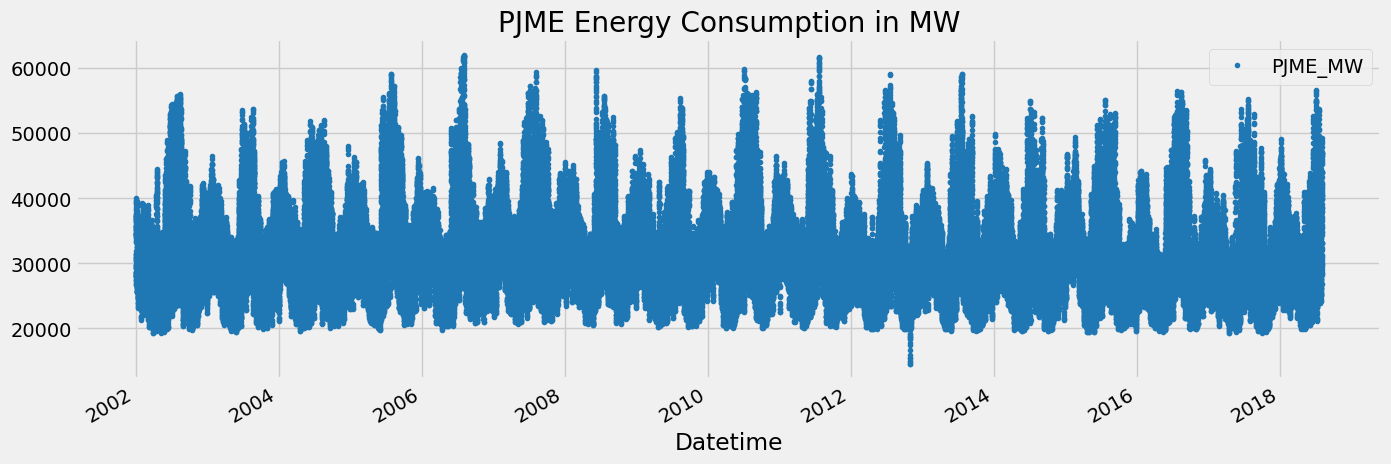

In [25]:
df.plot(style='.', figsize=(15,5), color=color_pal[0], title='PJME Energy Consumption in MW')
plt.show()

In [26]:
# Train Test Split

train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']

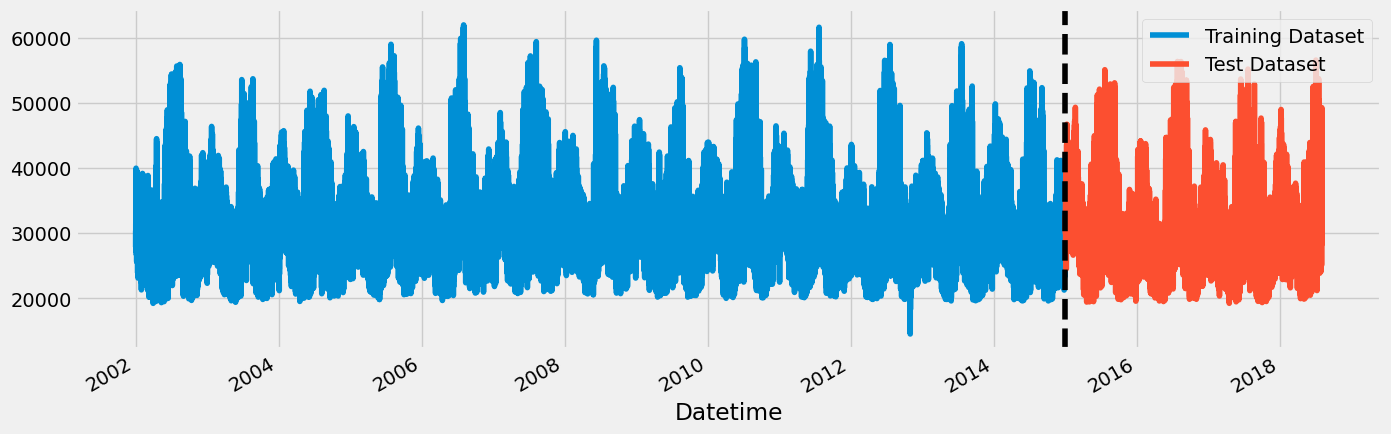

In [30]:
fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, label='Training Dataset')
test.plot(ax=ax, label='Test Dataset')
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend(['Training Dataset', 'Test Dataset'])
plt.show()

<Axes: title={'center': 'One Week of Energy Consumption'}, xlabel='Datetime'>

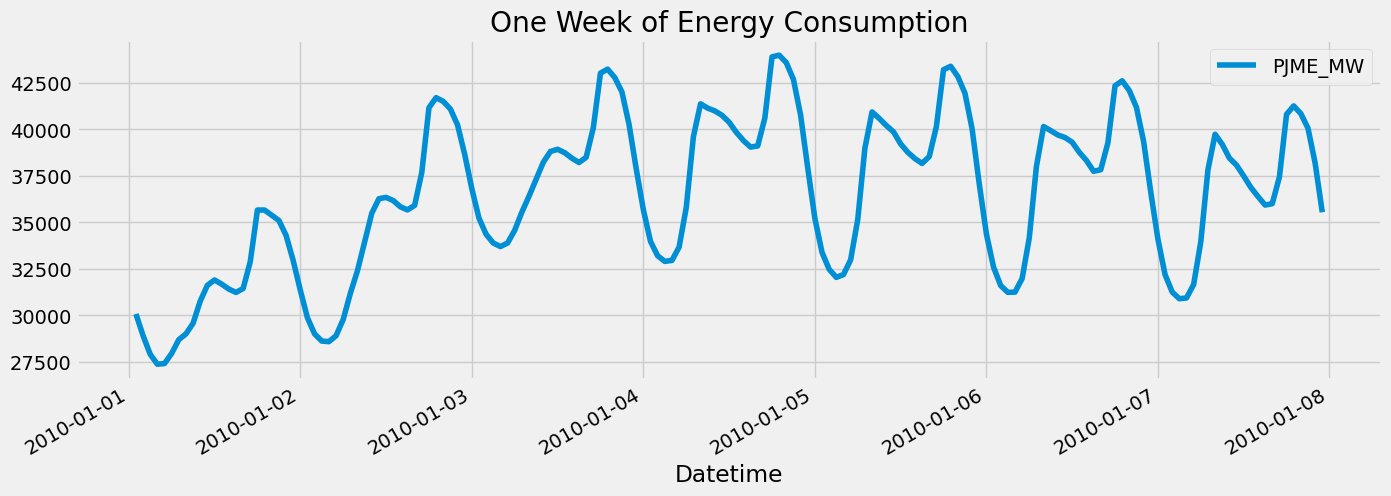

In [34]:
df.loc[(df.index > '01-01-2010') & (df.index < '01-08-2010')].plot(figsize=(15,5), title='One Week of Energy Consumption')

In [47]:
# Features

def create_features(df):
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek #Monday = 0 | Sunday = 6
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    return df

In [52]:
df = create_features(df)

<ipython-input-47-24730d382666>:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


Text(0.5, 1.0, 'MW by hour')

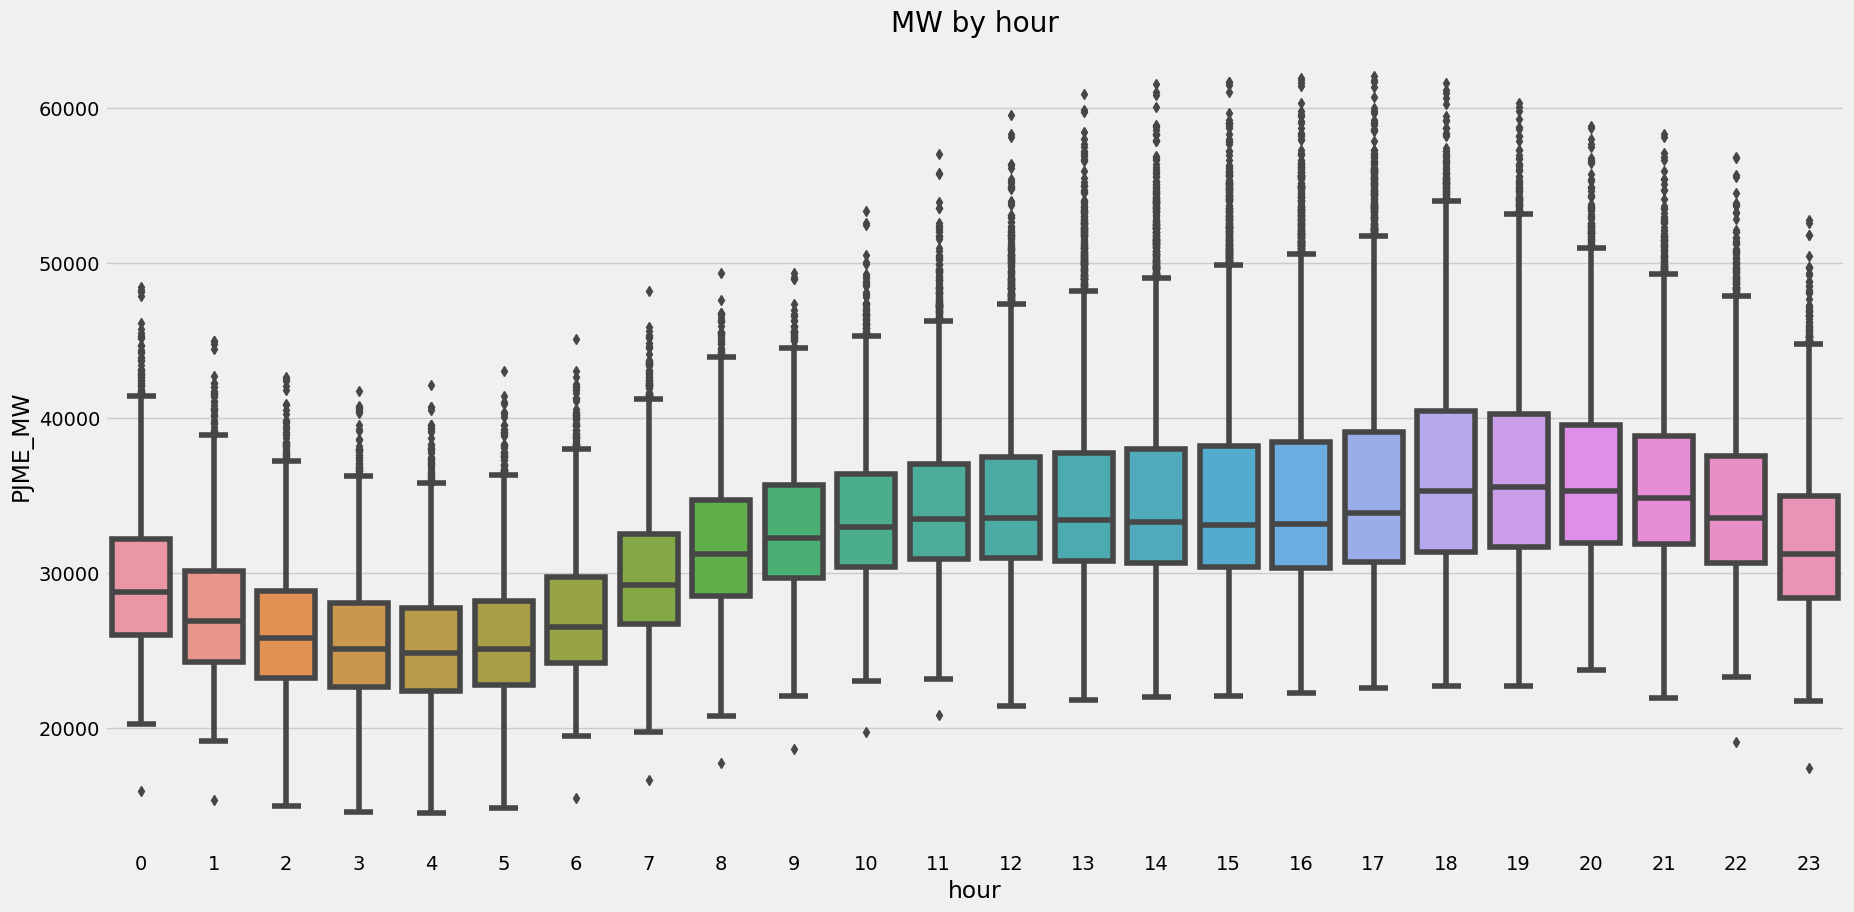

In [55]:
fix, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=df, x='hour', y='PJME_MW')
ax.set_title('MW by hour')

Text(0.5, 1.0, 'MW by week of the year')

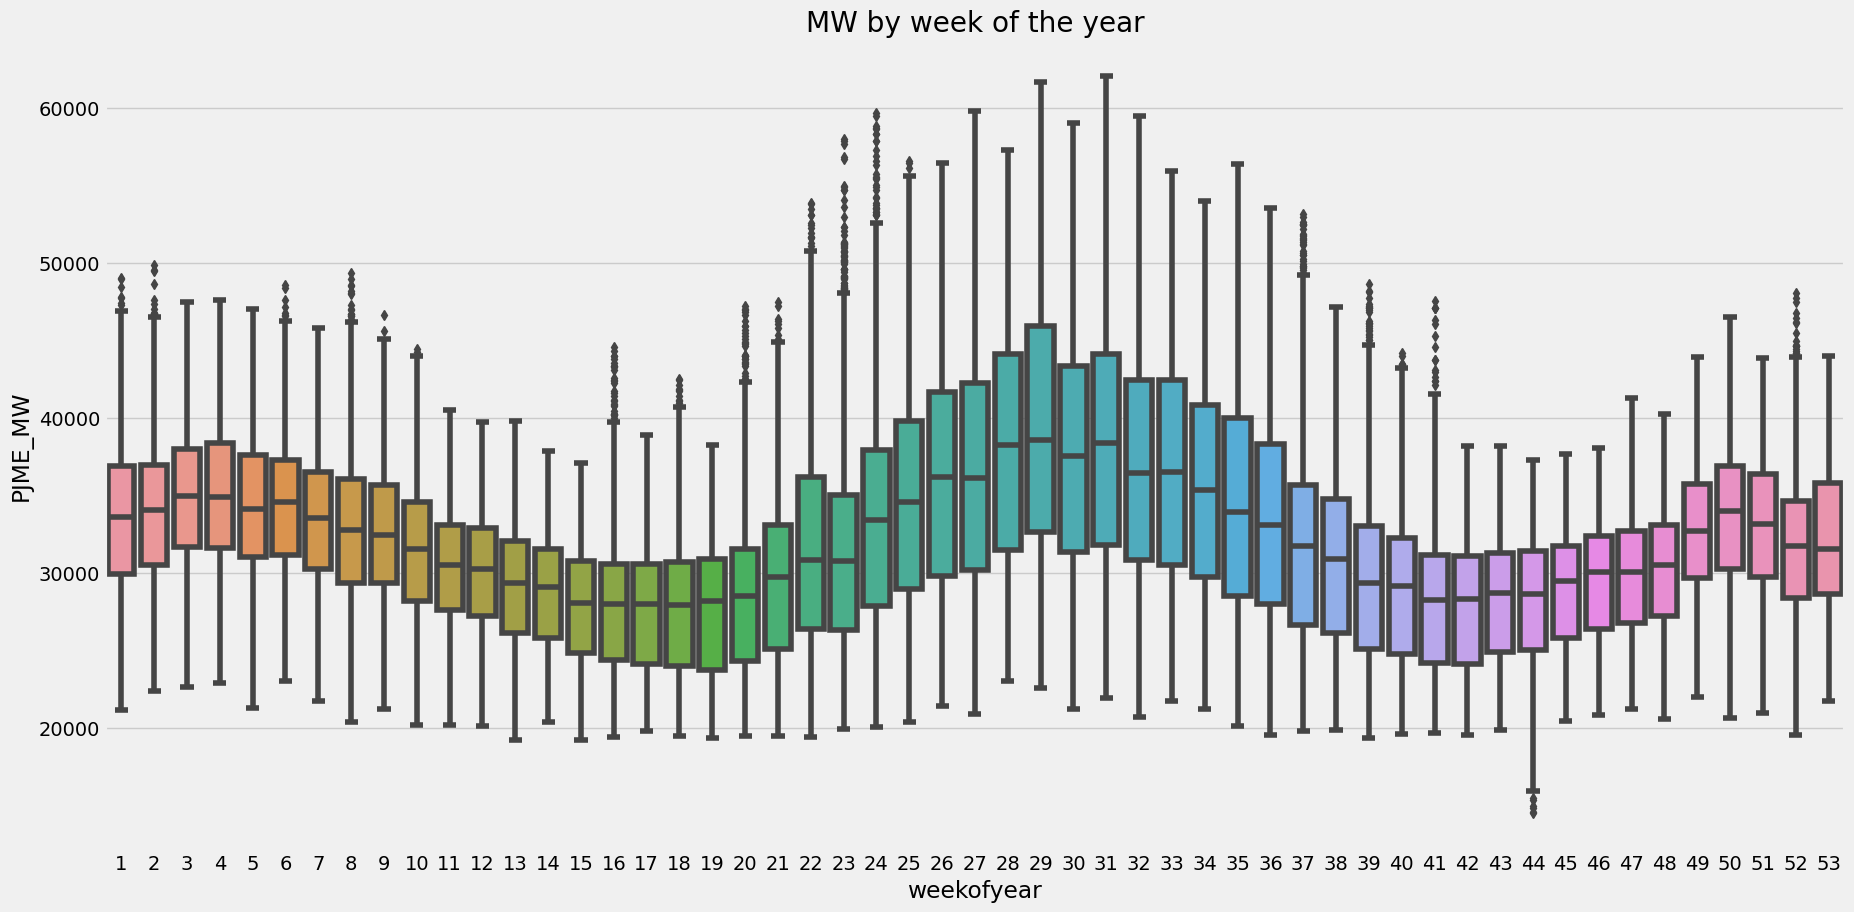

In [57]:
fix, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=df, x='weekofyear', y='PJME_MW')
ax.set_title('MW by week of the year')

Text(0.5, 1.0, 'MW by month')

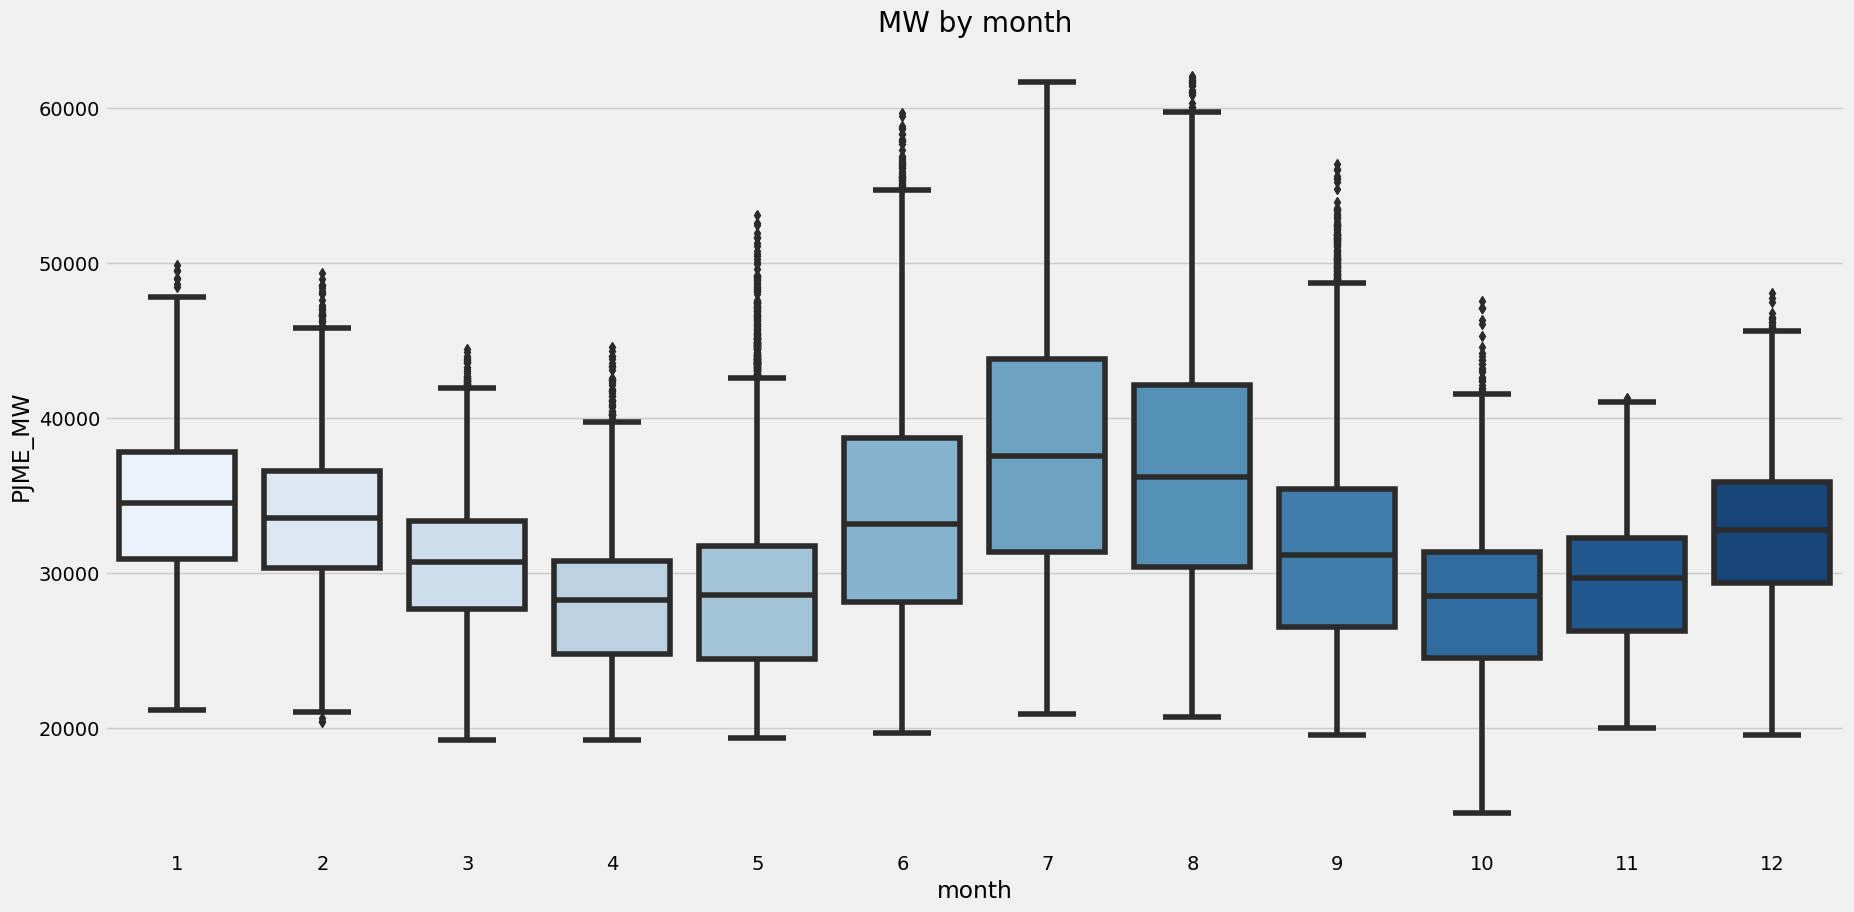

In [58]:
fix, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=df, x='month', y='PJME_MW', palette='Blues')
ax.set_title('MW by month')

In [60]:
df.columns

Index(['PJME_MW', 'date', 'hour', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')

In [67]:
Features = ['hour', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear', 'dayofmonth', 'weekofyear']
Target = ['PJME_MW']

In [68]:
X_train = train[Features]
y_train = train[Target]

X_test = test[Features]
y_test = test[Target]

In [71]:
# create model

model = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50, learning_rate=0.01)
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=100)

[0]	validation_0-rmse:32601.87768	validation_1-rmse:31654.68421
[100]	validation_0-rmse:12341.93512	validation_1-rmse:11516.90737
[200]	validation_0-rmse:5371.61499	validation_1-rmse:5156.86497
[300]	validation_0-rmse:3368.46387	validation_1-rmse:3831.79580
[400]	validation_0-rmse:2872.86038	validation_1-rmse:3713.20489
[440]	validation_0-rmse:2778.92852	validation_1-rmse:3733.06720


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)